# Détection d’Alzheimer à partir d’IRM du cerveau
L’objectif est de développer une méthode permettant de détecter les différents stades la maladie d’Alzheimer à partir d’imagerie à résonance
magnétique (IRM) en 3D du cerveau humain.

Pour cela, des architectures de type U-Net pourront être utilisées, avec différentes stratégies possibles (coupes 2D, patchs 3D, etc.).

Des données IRM anonymisées et annotées vous seront fournies pour travailler sur ce problème.

In [8]:
import os
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np 

Img2D training

In [6]:
def cut_2D_i(img_n_mmni, axe, idx):
    """Function that returns a 2D cut from the "img" in the index "idx", along the axe given in parameter"""
    axe_dim = {"x": img_n_mmni.shape[0], "y": img_n_mmni.shape[1], "z":img_n_mmni.shape[2]}
    if axe_dim[axe] <= idx or idx < 0:
        print("Invalid value for index must be between 0 and " , axe_dim[axe])
        return
    if axe == "x":
        cropped_img = img_n_mmni.slicer[idx:idx+1]
        img_data = cropped_img.get_fdata()
        img_data = np.transpose(img_data, (1, 2, 0))

    elif axe == "y":
        cropped_img = img_n_mmni.slicer[: ,idx:idx+1]
        img_data = cropped_img.get_fdata()
        img_data = np.transpose(img_data, (0, 2, 1))

    elif axe == "z":
        cropped_img = img_n_mmni.slicer[: , : , idx:idx+1]
        img_data = cropped_img.get_fdata()
    else:

        print("Choose a valid value for axe: x, y or z")

    return img_data

In [ ]:
img

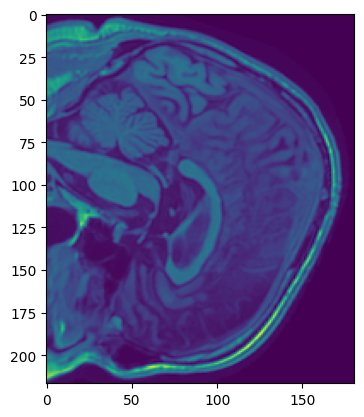

In [10]:
img = nib.load('data/ADNI1/n_mmni_fADNI_002_S_0295_1.5T_t1w.nii.gz')
img_x = cut_2D_i(img, 'x', 90)
plt.imshow(img_x)